In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

C:\Jupyter notebook\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('D:\DV Project\heart_2020_cleaned.csv')
df1 = pd.read_csv('D:\DV Project\Heart_Disease_Prediction.csv')

In [3]:
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [7]:
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [8]:
df.shape


(319795, 18)

In [9]:
df.isnull().values.any()


False

In [10]:
df['Sex'].value_counts()


Female    167805
Male      151990
Name: Sex, dtype: int64

In [11]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


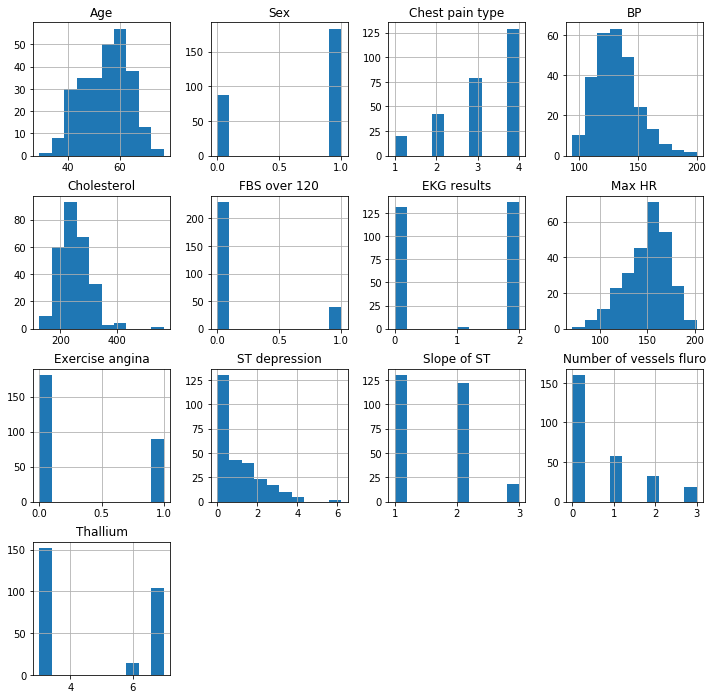

In [12]:
df1.hist(figsize =(12, 12))
plt.show()


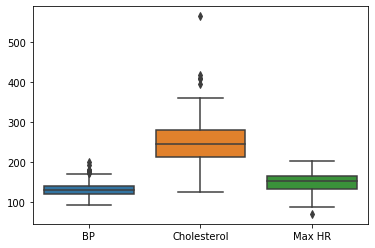

In [13]:
subset_df = df1[[ 'BP', 'Cholesterol', 'Max HR']]

# Create box plots using seaborn
sns.boxplot(data=subset_df)
#Here we can see outliers in all the three columns


In [14]:
# Specify the Z-score threshold for outlier removal
z_threshold = 3.4

# Calculate Z-scores for each column in the DataFrame
z_scores = np.abs((df1 - df1.mean()) / df1.std())

# Remove rows with Z-scores greater than the threshold
df1_cleaned = df1[(z_scores > z_threshold).any(axis=1)]


C:\Jupyter notebook\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [15]:
df1_cleaned

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
117,56,0,4,200,288,1,2,133,1,4.0,3,2,7,Presence
156,55,1,4,140,217,0,0,111,1,5.6,3,0,7,Presence
235,62,0,4,160,164,0,2,145,0,6.2,3,3,7,Presence


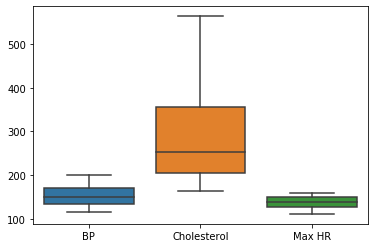

In [16]:
subset_df1 = df1_cleaned[[ 'BP', 'Cholesterol', 'Max HR']]

# Create box plots using seaborn
sns.boxplot(data=subset_df1)
#Here we can see outliers in all the three columns


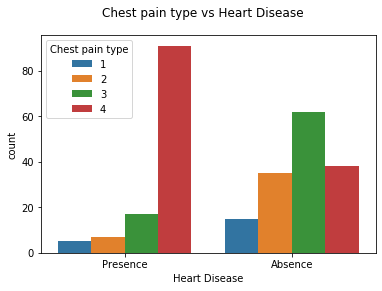

In [17]:
plt.suptitle('Chest pain type vs Heart Disease')
sns.countplot(data=df1, x='Heart Disease', hue='Chest pain type')
plt.show()

In [18]:
df[['Diabetic','Sex']].T

,0,1,2,3,4,5,6,7,8,9,...,319785,319786,319787,319788,319789,319790,319791,319792,319793,319794
Diabetic,Yes,No,Yes,No,No,No,No,Yes,"No, borderline diabetes",No,...,No,Yes,No,No,No,Yes,No,No,No,No
Sex,Female,Female,Male,Female,Female,Female,Female,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Male,Female,Female,Female


In [19]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

In [20]:
df[['Diabetic','Sex']].T

,0,1,2,3,4,5,6,7,8,9,...,319785,319786,319787,319788,319789,319790,319791,319792,319793,319794
Diabetic,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
Sex,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,1,1,0,0,0


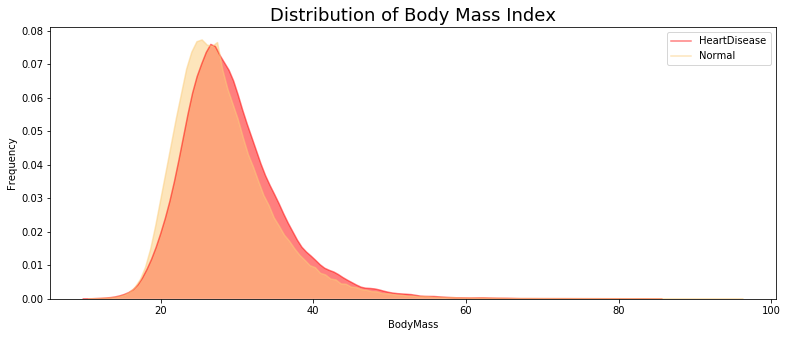

In [21]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

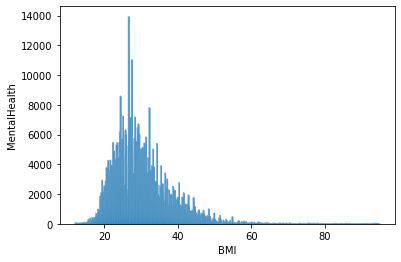

In [22]:
#AreaPlot
grouped_data = df.groupby('BMI')['MentalHealth'].sum()

grouped_data.plot(kind='area', stacked=False)


plt.xlabel('BMI')
plt.ylabel('MentalHealth')

plt.show()

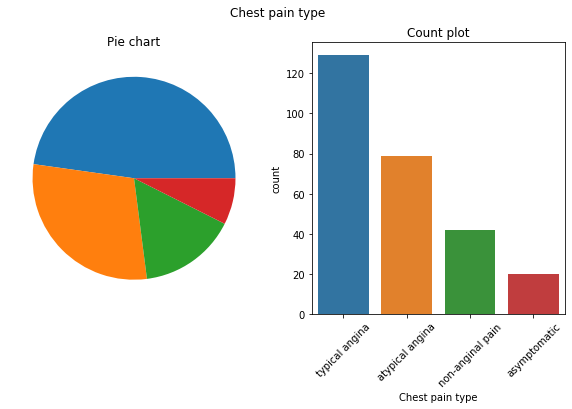

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [23]:
labels = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
order = df1['Chest pain type'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Chest pain type")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df1['Chest pain type'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Chest pain type', data=df1, order=order)
plt.xticks([0,1,2,3], labels, rotation=45)

plt.show()

df1['Chest pain type'].value_counts()